# WMM Laboratorium 1

Autorzy:
- Kacper Siemionek, 331430
- Wojtek Zieziula, ebebebe

## Potrzebne biblioteki

In [43]:
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1

## Zadanie 2

## Zadanie 3

Dane z treści zadania:

In [44]:
A = 3
N = 10
signal = np.array([A * (1 - (n % N) / N) for n in range(N)])

Funkcja do przedstawiania wykresów widma amplitudowego i fazowego sygnału dopełnionego podaną ilością zer:

In [45]:
def spectrum_plot(value, signal, N):
    with_zeros = np.zeros(N + value)
    with_zeros[:N] = signal

    amp_spectrum = np.abs(np.fft.fft(with_zeros))
    phase_spectrum = np.angle(np.fft.fft(with_zeros))

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    axs[0].stem(amp_spectrum, linefmt='b', markerfmt='bo', basefmt='b')
    axs[0].set_title(f'Widmo Amplitudowe ({int(value / 10)}N)')
    axs[0].grid(True)
    
    axs[1].stem(phase_spectrum, linefmt='r', markerfmt='ro', basefmt='r')
    axs[1].set_title(f'Widmo Fazowe ({int(value / 10)}N)')
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()

Wykresy dla dopełnienia równego 0:

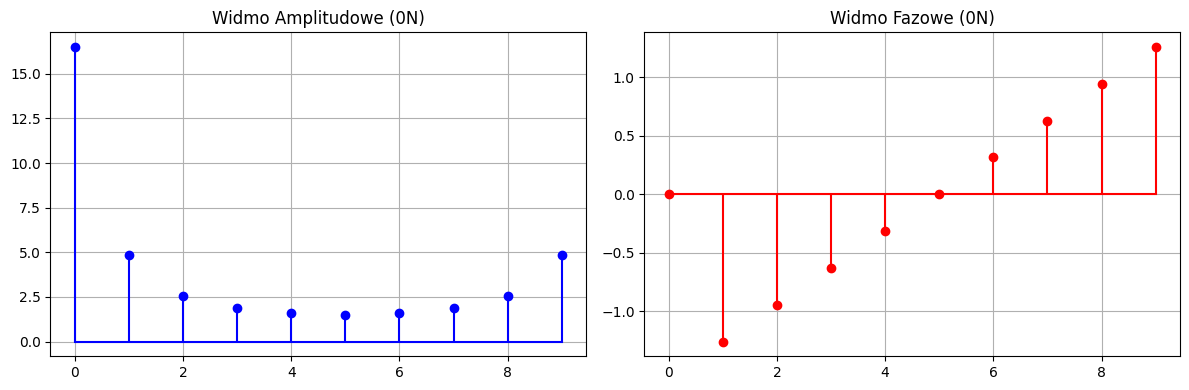

In [46]:
spectrum_plot(0, signal, N)

Wykresy dla dopełnienia równego 10:

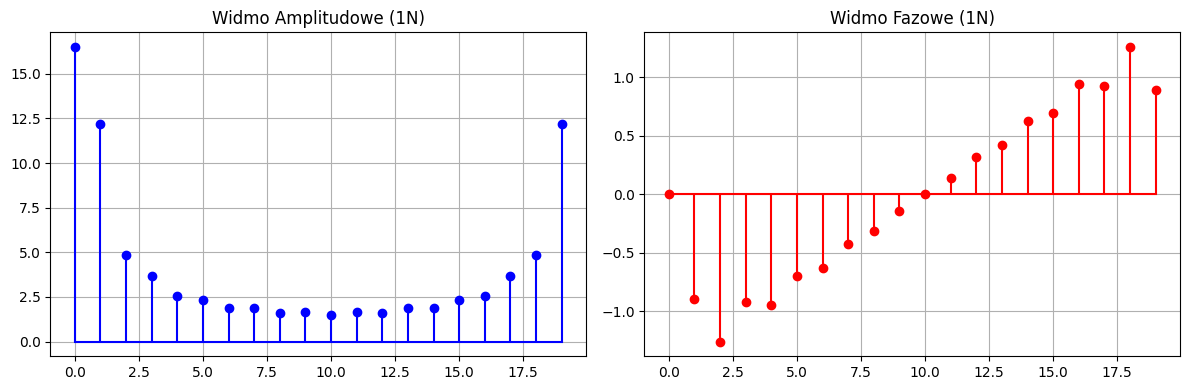

In [47]:
spectrum_plot(10, signal, N)

Wykresy dla dopełnienia równego 40:

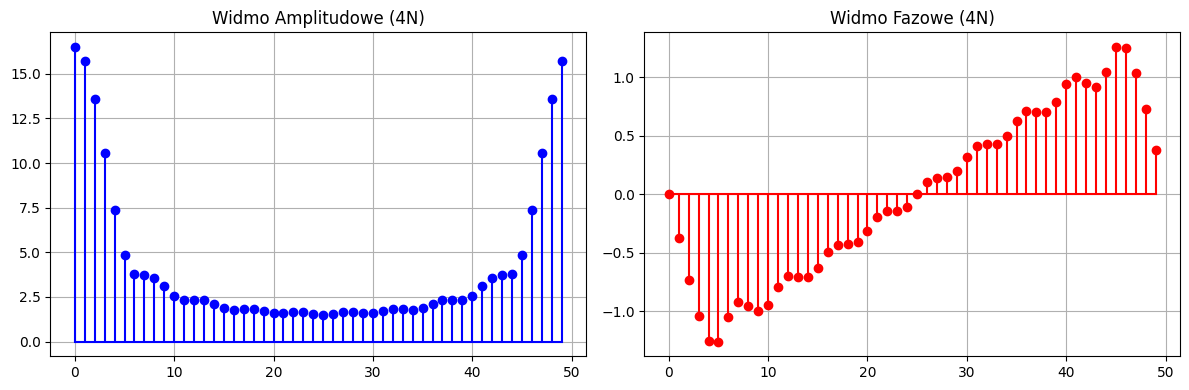

In [48]:
spectrum_plot(40, signal, N)

Wykresy dla dopełnienia równego 90:

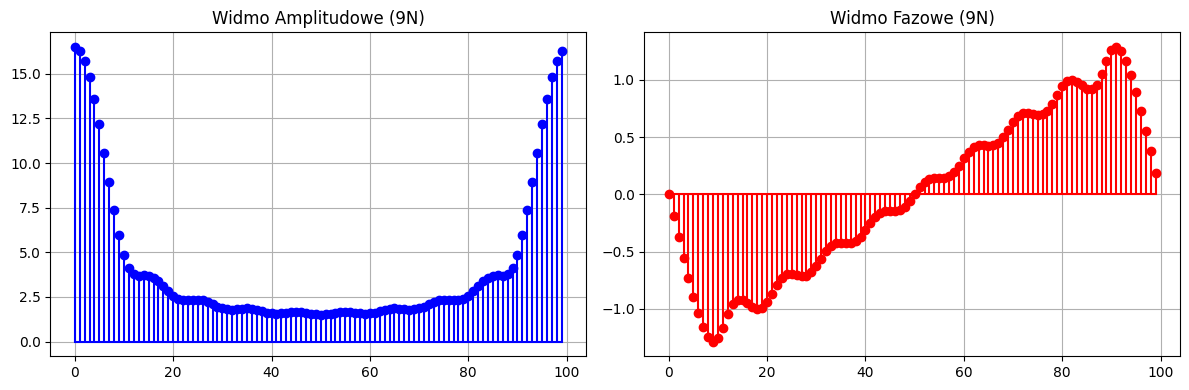

In [49]:
spectrum_plot(90, signal, N)

Zwiększając dopełnienie zagęszczamy wykresy widma amplitudowego i fazowego. Nie otrzymujemy nowych częstotliwości, jedynie zwiększamy rozdzielczość dyskretnej transformaty Fouriera.

## Zadanie 4

Dane z treści zadania:

In [50]:
A1, f1 = 0.1, 3000
A2, f2 = 0.4, 4000
A3, f3 = 0.8, 10000
fs = 48000

N1 = 2048
N2 = 3 * N1 // 2

Funkcja sygnału rzeczywistego s(t):

In [51]:
def signal_r(A1, A2, A3, f1, f2, f3, t):
    return (A1 * np.sin(2 * np.pi * f1 * t) +
            A2 * np.sin(2 * np.pi * f2 * t) +
            A3 * np.sin(2 * np.pi * f3 * t))

Funckja gęstości:

In [52]:
def psd(signal):
    N = len(signal)
    fft_val = np.fft.fft(signal)
    psd_values = 2 * np.abs(fft_val) / N
    psd_values[0] = psd_values[0] / 2
    return psd_values

Wykres widmowej gęstości mocy sygnału spróbkowanego dla N1 = 2048

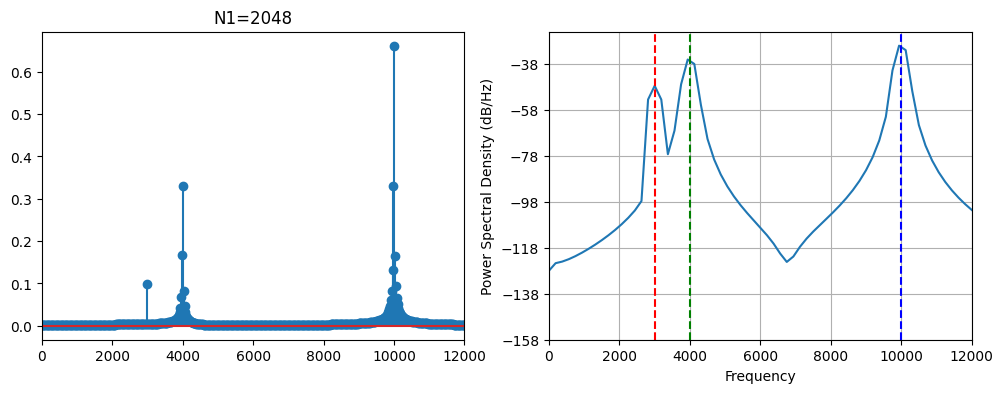

In [53]:
s1 = np.array([signal_r(A1, A2, A3, f1, f2, f3, n / fs) for n in range(N1)])

psd1 = psd(s1)
freq1 = np.fft.fftfreq(N1, 1 / fs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.stem(freq1, psd1)
plt.xlim(0, 12000)
plt.title(f'N1={N1}')

plt.subplot(1, 2, 2)
plt.psd(s1, Fs=fs)
plt.xlim(0, 12000)
plt.axvline(f1, color='r', linestyle='--', label='f1 = 3000 Hz')
plt.axvline(f2, color='g', linestyle='--', label='f2 = 4000 Hz')
plt.axvline(f3, color='b', linestyle='--', label='f3 = 10000 Hz')
plt.show()

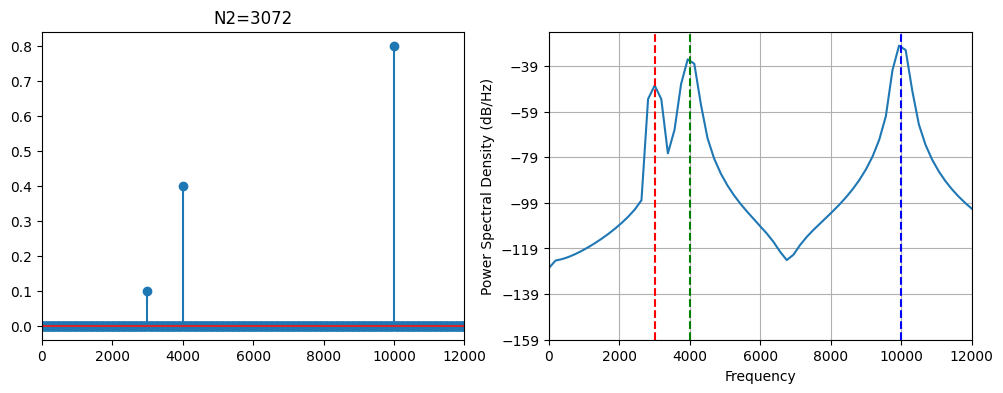

In [54]:
s2 = np.array([signal_r(A1, A2, A3, f1, f2, f3, n / fs) for n in range(N2)])

psd2 = psd(s2)
freq2 = np.fft.fftfreq(N2, 1 / fs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.stem(freq2, psd2)
plt.xlim(0, 12000)
plt.title(f'N2={N2}')

plt.subplot(1, 2, 2)
plt.psd(s2, Fs=fs)
plt.xlim(0, 12000)
plt.axvline(f1, color='r', linestyle='--', label='f1 = 3000 Hz')
plt.axvline(f2, color='g', linestyle='--', label='f2 = 4000 Hz')
plt.axvline(f3, color='b', linestyle='--', label='f3 = 10000 Hz')
plt.show()